# Autocompleting Selenium locators

A Jupyter Kernel is a long living process. It gets started after the first code cell is executed and it is shutdown only when explicitly requested so (or when the Jupyter client in use is shutdown).

For a Robot Framework kernel this means that the same kernel process outlives all the Robot Framework test runs it executes. This makes it possible for RobotKernel, for example, to "remember" all the Selenium connections (browsers) left open by the last Robot Framework run and reuse those at the next run.

And there is more: this makes it possible for RobotKernel to ask the currently open browser for available locators directly. Even inject an interactive picker to autocomplete a locator value.

## Configuration

Let's start with loading [SeleniumLibrary](http://robotframework.org/SeleniumLibrary/SeleniumLibrary.html) and also [SeleniumScreenshots](https://datakurre.github.io/robotframework-seleniumscreenshots/), because it makes fun demos with Selenium. 

But it is important that we don't define the usual ``Suite teardown  Close all browsers``, because we want to reuse the same browser window through multiple task executions.

In [1]:
*** Settings ***

Library  SeleniumLibrary
Library  SeleniumScreenshots

Next we define one useful keyword for this approach: ``Open singleton browser``. This only opens a new browser if the browser is not already open.

In [7]:
*** Keywords ***

Open singleton browser
    [Documentation]  Open a browser or re-use the opened browser
    [Arguments]  ${url}=about:blank
    Open browser  ${url}  alias=singleton

## Autocompleting locators

Now we are ready to learn, how to use RobotKernel's Selenium locator autocompletion.

Let's start with simply opening https://wikipedia.org/ in our singleton browser window.

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4yYTEgKFB5dGhvbiAzLjcuNSBvbiBsaW51eCkiIG5hbWU9IkdlbmVyYXRvciI+CjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4KPHN0eWxlIG1lZGlhPSJhbGwiIHR5cGU9InRleHQvY3NzIj4KLyogR2VuZXJpYyBhbmQgbWlzYyBzdHlsZXMgKi8KYm9keSB7CiAgICBmb250LWZhbWlseTogSGVsdmV0aWNhLCBzYW5zLXNlcmlmOwogICAgZm9udC1zaXplOiAwLjhlbTsKICAgIGNvbG9yOiBibGFjazsKICAgIHBhZGRpbmc6IDZweDsKICAgIGJhY2tncm91bmQ6IHdoaXRlOwp9CnRhYmxlIHsKICAgIHRhYmxlLWxheW91dDogZml4ZWQ7CiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7CiAgICBlbXB0eS1jZWxsczogc2hvdzsKICAgIGZvbnQtc2l6ZTogMWVtOwp9CnRoLCB0ZCB7CiAgICB2ZXJ0aWNhbC1hbGlnbjogdG9wOwp9CmJyIHsKICAgIG1zby1kYXRhLXBsYWNlbWVudDogc2FtZS1jZWxsOyAvKiBtYWludGFpbiBsaW5lIGJyZWFrcyBpbiBFeGNlbCAqLwp9CmhyIHsKICAgIGJhY2tncm91bmQ6ICNjY2M7CiAgICBoZWlnaHQ6IDFweDsKICAgIGJvcmRlcjogMDsKfQphLCBhOmxpbmssIGE6dmlzaXRlZCB7CiAgICB0ZXh0LWRlY29yYXRpb246IG5vbmU7CiAgICBjb2xvcjogIzE1YzsKfQphID4gaW1nIHsKICAgIGJvcmRlcjogMXB4IHNvbGlkICMxNWMgIWltcG9ydGFudDsKfQphOmhvdmVyLCBhOmFjdGl2ZSB7CiAgICB0ZXh0LWRlY29yYXRpb246IHVuZGVybGluZTsKICAgIGNvbG9yOiAjNjFjOwp9Ci5wYXJlbnQtbmFtZSB7CiAgICBmb250LXNpemU6IDAuN2VtOwogICAgbGV0dGVyLXNwYWNpbmc6IC0wLjA3ZW07Cn0KLm1lc3NhZ2UgewogICAgd2hpdGUtc3BhY2U6IHByZS13cmFwOwp9Ci8qIEhlYWRlcnMgKi8KI2hlYWRlciB7CiAgICB3aWR0aDogNjVlbTsKICAgIGhlaWdodDogM2VtOwogICAgbWFyZ2luOiA2cHggMDsKfQpoMSB7CiAgICBmbG9hdDogbGVmdDsKICAgIG1hcmdpbjogMCAwIDAuNWVtIDA7CiAgICB3aWR0aDogNzUlOwp9CmgyIHsKICAgIGNsZWFyOiBsZWZ0Owp9CiNnZW5lcmF0ZWQgewogICAgZmxvYXQ6IHJpZ2h0OwogICAgdGV4dC1hbGlnbjogcmlnaHQ7CiAgICBmb250LXNpemU6IDAuOW

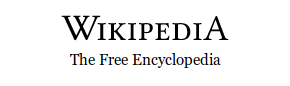

In [3]:
*** Tasks ***

Show Wikipedia
    Open singleton browser  https://wikipedia.org
    Capture and crop page screenshot
    ...  wikipedia.png
    ...  css:H1

Now we should have https://wikipedia.org/ open. Try executing that cell multiple times. It should be pretty fast, because the browser is never closed between executions and the subsequent executions may uses the already open browser.

Now let's repeat the previous keyword, but try to enter input into the search box by typing ``Input text`` ``id:`` and pressing ``TAB`` key, the Jupyter autocompletion default key.

After that ``TAB`` Jupyter should propose us all the available ids at the current page and also highlight them on the page.

Unfortunately, it is not currently possible to highlight them one by one while selecting (but you could highlight the selected one by pressing `TAB` after selecting the value to be autocompleted).

Thanks to Wikipedia's design, it is easy to guess that ``id:searchInput`` is the locator for the search input field.

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4yYTEgKFB5dGhvbiAzLjcuNSBvbiBsaW51eCkiIG5hbWU9IkdlbmVyYXRvciI+CjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4KPHN0eWxlIG1lZGlhPSJhbGwiIHR5cGU9InRleHQvY3NzIj4KLyogR2VuZXJpYyBhbmQgbWlzYyBzdHlsZXMgKi8KYm9keSB7CiAgICBmb250LWZhbWlseTogSGVsdmV0aWNhLCBzYW5zLXNlcmlmOwogICAgZm9udC1zaXplOiAwLjhlbTsKICAgIGNvbG9yOiBibGFjazsKICAgIHBhZGRpbmc6IDZweDsKICAgIGJhY2tncm91bmQ6IHdoaXRlOwp9CnRhYmxlIHsKICAgIHRhYmxlLWxheW91dDogZml4ZWQ7CiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7CiAgICBlbXB0eS1jZWxsczogc2hvdzsKICAgIGZvbnQtc2l6ZTogMWVtOwp9CnRoLCB0ZCB7CiAgICB2ZXJ0aWNhbC1hbGlnbjogdG9wOwp9CmJyIHsKICAgIG1zby1kYXRhLXBsYWNlbWVudDogc2FtZS1jZWxsOyAvKiBtYWludGFpbiBsaW5lIGJyZWFrcyBpbiBFeGNlbCAqLwp9CmhyIHsKICAgIGJhY2tncm91bmQ6ICNjY2M7CiAgICBoZWlnaHQ6IDFweDsKICAgIGJvcmRlcjogMDsKfQphLCBhOmxpbmssIGE6dmlzaXRlZCB7CiAgICB0ZXh0LWRlY29yYXRpb246IG5vbmU7CiAgICBjb2xvcjogIzE1YzsKfQphID4gaW1nIHsKICAgIGJvcmRlcjogMXB4IHNvbGlkICMxNWMgIWltcG9ydGFudDsKfQphOmhvdmVyLCBhOmFjdGl2ZSB7CiAgICB0ZXh0LWRlY29yYXRpb246IHVuZGVybGluZTsKICAgIGNvbG9yOiAjNjFjOwp9Ci5wYXJlbnQtbmFtZSB7CiAgICBmb250LXNpemU6IDAuN2VtOwogICAgbGV0dGVyLXNwYWNpbmc6IC0wLjA3ZW07Cn0KLm1lc3NhZ2UgewogICAgd2hpdGUtc3BhY2U6IHByZS13cmFwOwp9Ci8qIEhlYWRlcnMgKi8KI2hlYWRlciB7CiAgICB3aWR0aDogNjVlbTsKICAgIGhlaWdodDogM2VtOwogICAgbWFyZ2luOiA2cHggMDsKfQpoMSB7CiAgICBmbG9hdDogbGVmdDsKICAgIG1hcmdpbjogMCAwIDAuNWVtIDA7CiAgICB3aWR0aDogNzUlOwp9CmgyIHsKICAgIGNsZWFyOiBsZWZ0Owp9CiNnZW5lcmF0ZWQgewogICAgZmxvYXQ6IHJpZ2h0OwogICAgdGV4dC1hbGlnbjogcmlnaHQ7CiAgICBmb250LXNpemU6IDAuOW

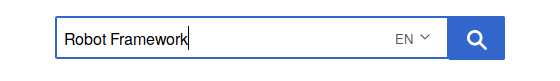

In [4]:
*** Tasks ***

Type a search into Wikipedia's prompt
    Open singleton browser  https://wikipedia.org/
    Input text
    ...  id:searchInput
    ...  Robot Framework
    Capture and crop page screenshot  wikipedia.png
    ...  css:[id='search-form'] > *

This simple is how autocompleting locators with RobotKernel works. Autocompleting supports most of the Selenium locator stregies:

* For ``id:``, ``name:``, and ``link:`` strategies RobotKernel  will list all the available options.

* For other strategies it is required to give some beginning for the locator, and then, RobotKernel tries to find completed matches for them, or automatically autocompletes the locator if there is only one matching element found.

Then, finally, there is a very single special locator, empty ``css:``...

## Interactive picker for the locator

When `TAB` is pressed after empty `css:` locator, RobotKernel does something special: **RobotKernel prompts you to select the the element directly from the browser**.

Let's use this for pressing the search button.

Again, let's copy the previous task, but after ``Input text`` keyword, add ``Click button`` ``css:`` and press `TAB`.

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4yYTEgKFB5dGhvbiAzLjcuNSBvbiBsaW51eCkiIG5hbWU9IkdlbmVyYXRvciI+CjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4KPHN0eWxlIG1lZGlhPSJhbGwiIHR5cGU9InRleHQvY3NzIj4KLyogR2VuZXJpYyBhbmQgbWlzYyBzdHlsZXMgKi8KYm9keSB7CiAgICBmb250LWZhbWlseTogSGVsdmV0aWNhLCBzYW5zLXNlcmlmOwogICAgZm9udC1zaXplOiAwLjhlbTsKICAgIGNvbG9yOiBibGFjazsKICAgIHBhZGRpbmc6IDZweDsKICAgIGJhY2tncm91bmQ6IHdoaXRlOwp9CnRhYmxlIHsKICAgIHRhYmxlLWxheW91dDogZml4ZWQ7CiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7CiAgICBlbXB0eS1jZWxsczogc2hvdzsKICAgIGZvbnQtc2l6ZTogMWVtOwp9CnRoLCB0ZCB7CiAgICB2ZXJ0aWNhbC1hbGlnbjogdG9wOwp9CmJyIHsKICAgIG1zby1kYXRhLXBsYWNlbWVudDogc2FtZS1jZWxsOyAvKiBtYWludGFpbiBsaW5lIGJyZWFrcyBpbiBFeGNlbCAqLwp9CmhyIHsKICAgIGJhY2tncm91bmQ6ICNjY2M7CiAgICBoZWlnaHQ6IDFweDsKICAgIGJvcmRlcjogMDsKfQphLCBhOmxpbmssIGE6dmlzaXRlZCB7CiAgICB0ZXh0LWRlY29yYXRpb246IG5vbmU7CiAgICBjb2xvcjogIzE1YzsKfQphID4gaW1nIHsKICAgIGJvcmRlcjogMXB4IHNvbGlkICMxNWMgIWltcG9ydGFudDsKfQphOmhvdmVyLCBhOmFjdGl2ZSB7CiAgICB0ZXh0LWRlY29yYXRpb246IHVuZGVybGluZTsKICAgIGNvbG9yOiAjNjFjOwp9Ci5wYXJlbnQtbmFtZSB7CiAgICBmb250LXNpemU6IDAuN2VtOwogICAgbGV0dGVyLXNwYWNpbmc6IC0wLjA3ZW07Cn0KLm1lc3NhZ2UgewogICAgd2hpdGUtc3BhY2U6IHByZS13cmFwOwp9Ci8qIEhlYWRlcnMgKi8KI2hlYWRlciB7CiAgICB3aWR0aDogNjVlbTsKICAgIGhlaWdodDogM2VtOwogICAgbWFyZ2luOiA2cHggMDsKfQpoMSB7CiAgICBmbG9hdDogbGVmdDsKICAgIG1hcmdpbjogMCAwIDAuNWVtIDA7CiAgICB3aWR0aDogNzUlOwp9CmgyIHsKICAgIGNsZWFyOiBsZWZ0Owp9CiNnZW5lcmF0ZWQgewogICAgZmxvYXQ6IHJpZ2h0OwogICAgdGV4dC1hbGlnbjogcmlnaHQ7CiAgICBmb250LXNpemU6IDAuOW

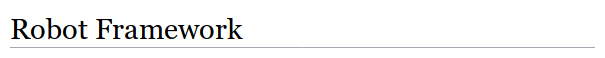

In [5]:
*** Tasks ***

Execute Wikipedia search
    Open singleton browser  https://wikipedia.org/
    Input text
    ...  id:searchInput
    ...  Robot Framework
    Click button
    ...  css:FIELDSET > BUTTON
    Capture and crop page screenshot  wikipedia.png
    ...  css:H1

These autocompletion and picker features are subject to change in the future RobotKernel releases, but hopefully only for better.

## Closing the browser window

The "singleton" browser window used in this example is closed when the Jupyter client is shutown or kernel is shutdown from the Jupyter client user interface.

Yet, it might be a good practice to register a closing keyword at the end of notebook. Then it should be easy to avoid including it when authoring the notebook, but it would be taken account if the notebook was executed from the command line.

In [6]:
*** Settings ***

Suite teardown  Close all browsers

*** Tasks ***

No operation
    No operation

<a href="about:" onClick="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4yYTEgKFB5dGhvbiAzLjcuNSBvbiBsaW51eCkiIG5hbWU9IkdlbmVyYXRvciI+CjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFBQUFFQUlBQm9CQUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBSUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUtjQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBcUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUE0QUFBQU53QUFBRGNBQUFBM0FBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUE0QUFBQVA4QUFBQ3hBQUFBQUFBQUFLWUFBQUQvQUFBQXV3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFDL0FBQUEvd0FBQUtrQUFBRDZBQUFBekFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjhBQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBQWdBQUFHc0FBQUJyQUFBQWF3QUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBREFBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUlzQUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQU5FQUFBQUFBQUFBMmdBQUFQOEFBQUQ2QUFBQXd3QUFBQUFBQUFBQUFBQUFNZ0FBQURJQUFBQXlBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBRkFBQUFBQUFBQU5vQUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFEd0FBQUI4QUFBQUFBQUFBR0FBQUFCY0FBQUFBQUFBQUg4QUFBQktBQUFBQUFBQUFBQUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBRENBQUFBL3dBQUFDa0FBQURxQUFBQTRRQUFBQUFBQUFEN0FBQUEvd0FBQUxBQUFBQUdBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFJd0FBQVA0QUFBRC9BQUFBL3dBQUFHQUFBQUFBQUFBQUFBQUFBTWtBQUFEL0FBQUFpZ0FBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBQUFBQUFBSUFBQUFjQUFBQUJrQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUVnQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDdBQUFBeXdBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTjRBQUFEL0FBQUFxd0FBQVA4QUFBQ3ZBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFMSUFBQUQvQUFBQXNnQUFBQUFBQUFDNUFBQUEvd0FBQU1vQUFBREFBQUFBd0FBQUFNQUFBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1rQUFBRC9BQUFBdkFBQUFBQUFBQUFBQUFBQUFBQUFBS3dBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUFyUUFBQUFBQUFBQUF3QU1BQUlBQkFBQWYrQUFBUC93QUFELzhBQUFnQkFBQVAvd0FBRC84QUFBLy9BQUFKSXdBQURIRUFBQS8vQUFBUC93QUFCLzRBQUNBQVFBQXdBTUFBQT09Ij4KPHN0eWxlIG1lZGlhPSJhbGwiIHR5cGU9InRleHQvY3NzIj4KLyogR2VuZXJpYyBhbmQgbWlzYyBzdHlsZXMgKi8KYm9keSB7CiAgICBmb250LWZhbWlseTogSGVsdmV0aWNhLCBzYW5zLXNlcmlmOwogICAgZm9udC1zaXplOiAwLjhlbTsKICAgIGNvbG9yOiBibGFjazsKICAgIHBhZGRpbmc6IDZweDsKICAgIGJhY2tncm91bmQ6IHdoaXRlOwp9CnRhYmxlIHsKICAgIHRhYmxlLWxheW91dDogZml4ZWQ7CiAgICB3b3JkLXdyYXA6IGJyZWFrLXdvcmQ7CiAgICBlbXB0eS1jZWxsczogc2hvdzsKICAgIGZvbnQtc2l6ZTogMWVtOwp9CnRoLCB0ZCB7CiAgICB2ZXJ0aWNhbC1hbGlnbjogdG9wOwp9CmJyIHsKICAgIG1zby1kYXRhLXBsYWNlbWVudDogc2FtZS1jZWxsOyAvKiBtYWludGFpbiBsaW5lIGJyZWFrcyBpbiBFeGNlbCAqLwp9CmhyIHsKICAgIGJhY2tncm91bmQ6ICNjY2M7CiAgICBoZWlnaHQ6IDFweDsKICAgIGJvcmRlcjogMDsKfQphLCBhOmxpbmssIGE6dmlzaXRlZCB7CiAgICB0ZXh0LWRlY29yYXRpb246IG5vbmU7CiAgICBjb2xvcjogIzE1YzsKfQphID4gaW1nIHsKICAgIGJvcmRlcjogMXB4IHNvbGlkICMxNWMgIWltcG9ydGFudDsKfQphOmhvdmVyLCBhOmFjdGl2ZSB7CiAgICB0ZXh0LWRlY29yYXRpb246IHVuZGVybGluZTsKICAgIGNvbG9yOiAjNjFjOwp9Ci5wYXJlbnQtbmFtZSB7CiAgICBmb250LXNpemU6IDAuN2VtOwogICAgbGV0dGVyLXNwYWNpbmc6IC0wLjA3ZW07Cn0KLm1lc3NhZ2UgewogICAgd2hpdGUtc3BhY2U6IHByZS13cmFwOwp9Ci8qIEhlYWRlcnMgKi8KI2hlYWRlciB7CiAgICB3aWR0aDogNjVlbTsKICAgIGhlaWdodDogM2VtOwogICAgbWFyZ2luOiA2cHggMDsKfQpoMSB7CiAgICBmbG9hdDogbGVmdDsKICAgIG1hcmdpbjogMCAwIDAuNWVtIDA7CiAgICB3aWR0aDogNzUlOwp9CmgyIHsKICAgIGNsZWFyOiBsZWZ0Owp9CiNnZW5lcmF0ZWQgewogICAgZmxvYXQ6IHJpZ2h0OwogICAgdGV4dC1hbGlnbjogcmlnaHQ7CiAgICBmb250LXNpemU6IDAuOW